# Regresión lineal simple
## El paquete statsmodel para regresión lineal

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
linear_model = smf.ols(formula='Sales ~ TV', data = data).fit()  # fit() ajusta una recta a los puntos

In [26]:
linear_model.params  # Parámetros del modelo

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería:
* Sales = 7.032593 + 0.047537 * TV

In [27]:
linear_model.pvalues   # P valores

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [28]:
linear_model.rsquared  # R2

0.611875050850071

In [29]:
linear_model.rsquared_adj  # R2 ajustado

0.6099148238341623

In [30]:
# Resumen de todos los valores
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        08:20:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Predicción de las ventas de cada fila en base a un parámetro de entrada (TVs)
sales_pred = linear_model.predict(pd.DataFrame(data['TV']))   # Se convierte una columna del df en dataframe
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [101]:
len(sales_pred)

200

Text(0.5, 1.0, 'TVs vs Sales')

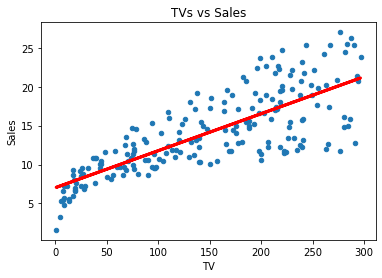

In [32]:
data.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c = 'red', linewidth = 3)
plt.title('TVs vs Sales')

In [33]:
data['Sales prediction'] = 7.032594 + 0.047537 * data['TV']

In [57]:
data['RSE'] = (data['Sales'] - data['Sales prediction']) ** 2

In [35]:
SSD = sum(data['RSE'])
SSD

2102.5305838896525

In [54]:
RSE = np.sqrt(SSD / (len(data) - 2)) # Restar num de variables predictoras menos 1
RSE

3.258656369238098

In [37]:
sales_mean = np.mean(data['Sales'])
sales_mean

14.0225

In [38]:
error = RSE/sales_mean
error*100

23.238768901680142

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

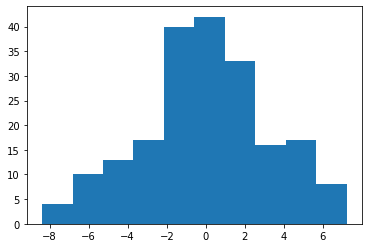

In [39]:
plt.hist(data['Sales'] - data['Sales prediction'])

# Regresión lineal múltiple
## El paquete statsmodel para regresión múltiple
Más de una variable predictora:
* Sales - TV
* Sales - Newspaper
* Sales - Radio
* Sales - TV + Newspaper
* Sales - TV + Radio
* Sales - Newspaper + Radio
* Sales - TV + Newspaper + Radio

Número de modelos
* Modelos = (2 ^ k) - 1
* k = variables predictoras, 3 en este caso (TV, Newspaper, Radio)

In [45]:
linear_model2 = smf.ols(formula = 'Sales ~ TV + Newspaper', data = data).fit()

In [47]:
linear_model2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Los p valores son bastante aceptables por ser pequeños

In [48]:
linear_model2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

El modelo lineal predictivo sería:
* Sales = 5.774948 + 0.046901TV + 0.044219Newspaper

In [51]:
print(linear_model2.rsquared)
print(linear_model2.rsquared_adj)

0.6458354938293273
0.6422399150864777


Los valores de R2 YR2 ajustada aumentaron un poco comparados con el modelo de regresión lineal

In [53]:
sales_pred2 = linear_model2.predict(data[['TV', 'Newspaper']])
sales_pred2

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [58]:
SSD = sum((data['Sales'] - sales_pred2) ** 2)
SSD

1918.561811896827

In [71]:
RSE = np.sqrt(SSD / (len(data) - 3))   # Restar num de variables predictoras menos 1
RSE

3.120719860252885

In [61]:
error2 = RSE / sales_mean
error2

0.2225508903728212

El error disminuyó un poco

In [63]:
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           3.95e-45
Time:                        09:40:54   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ahora se cambia una variable predictora más para ver si mejora el modelo

In [69]:
# Añadir la radio al modelo existente
linear_model3 = smf.ols(formula = 'Sales ~ TV + Radio', data = data).fit()

In [70]:
linear_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        09:45:12   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo mejoró drásticamente. El F estadístico es demasiado pequeño, las R2 aumentaron mucho.

In [75]:
sales_pred3 = linear_model3.predict(data[['TV', 'Radio']])
SSD = sum((data['Sales'] - sales_pred3) ** 2)
RSE = np.sqrt(SSD / (len(data) - 3))
error3 = RSE / sales_mean

In [76]:
RSE

1.6813609125080007

In [82]:
error3

0.11990450436855059

### Ahora se agrega una variable predictora más para ver si mejora el modelo (3 variables)

In [83]:
# Modelo con TV, Newspaper y Radio
linear_model4 = smf.ols(formula = 'Sales ~ TV + Newspaper + Radio', data = data).fit()

In [85]:
linear_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        09:55:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El p valor de Newspaper es muy alto, casi 1, por lo que se puede rechazar. Incluso el coeficiente de Newspaper es negativo, por lo que invertir en periódico restaría a las ventas. El modelo es muy similar a tener las 2 variables anteriores. Este modelo es menos eficaz que el anterior.

In [87]:
sales_pred4 = linear_model4.predict(data[['TV', 'Newspaper','Radio']])
SSD = sum((data['Sales'] - sales_pred4) ** 2)
RSE = np.sqrt(SSD / (len(data) - 4))
error4 = RSE / sales_mean

In [88]:
RSE

1.685510373414744

In [89]:
error4

0.1202004188564624

# Multicolinealidad
El último modelo con 3 variables predictoras resultó afectado por la multicolinealidad, es decir, la correlación entre 2 de las variables predictoras era muy alta. En este caso, Newspaper y Radio, como se podía ver en la matriz coloreada del script pasado.

### Factor de inflación de la varianza (VIF)
Se usa el factor de inflación de la varianza, donde de debe escribir la variable predictora que da problemas en función de otras variables.

* Si VIF = 1      ->  No hay correlación entre las variables
* Si 1 < VIF < 5  ->  Hay correlación moderada entre las variables pero se puede seguir usando en el modelo
* Si VIF > 5      ->  Hay mucha correlación entre las variables y se deben sacar del modelo

In [97]:
# Newspaper - TV + Radio  ->  R^2   VIF = 1 / (1 - R^2)

linear_model_n = smf.ols(formula = 'Newspaper ~ TV + Radio', data = data).fit()
rsquared_n = linear_model_n.rsquared
VIF_n = 1 / (1 - rsquared_n)
VIF_n

1.1451873787239286

In [98]:
# TV - Newspaper + Radio  ->  R^2   VIF = 1 / (1 - R^2)
linear_model_tv = smf.ols(formula = 'TV ~ Newspaper + Radio', data = data).fit()
rsquared_tv = linear_model_tv.rsquared
VIF_tv = 1 / (1 - rsquared_tv)
VIF_tv

1.0046107849396502

In [100]:
# Radio - TV + Newspaper  ->  R^2   VIF = 1 / (1 - R^2)

linear_model_r = smf.ols(formula = 'Radio ~ TV + Newspaper', data = data).fit()
rsquared_r = linear_model_r.rsquared
VIF_r = 1 / (1 - rsquared_r)
VIF_r

1.1449519171055353